# Local Age vs Host Stellar Mass

This plot will look at the prediction made in Childress 2014 figure 4.

In [4]:
from glob import glob
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('talk')
from scipy.stats import spearmanr

## Verrify
Check to make sure stellar mass is some what related to my c paramter.

## Age v Host Mass

In [2]:
galaxy = pd.read_csv('../resources/kcorrect_stellarmass.csv',  usecols=['GAL', 'redshift', 'stellarmass'], index_col='GAL')
galaxy = galaxy[galaxy['redshift']<0.2]
galaxy

,redshift,stellarmass
GAL,,
10028,0.065329,2.959660e+10
1032,0.129755,2.856640e+10
10805,0.045363,8.579470e+09
11172,0.136222,1.522050e+10
12860,0.121708,1.971160e+10
12898,0.083581,5.865850e+09
12950,0.082657,5.773250e+09
13135,0.104671,7.216360e+10
13354,0.157625,2.170690e+10


In [5]:
age_local = pd.read_csv('../resources/ages_campbell.tsv', sep='\t',  skiprows=[1],
                   usecols=['# sn id', 'age'], dtype={'age': np.float64, '# sn id': np.int})
age_local.rename(columns={'# sn id': 'SNID'}, inplace=True)
age_local.set_index('SNID', inplace=True)
age_local

,age
SNID,
1794,4.008011
6057,6.340306
15301,4.486672
15234,5.319935
17168,3.787043
20084,2.412834
3317,5.402447
19772,8.549741
13354,6.086013


## Get Median ages

These are not great age estimates. The distributions are more complex than this.

In [6]:
age_global = pd.read_csv('../resources/ages_campbellG.tsv', sep='\t',  skiprows=[1],
                   usecols=['# sn id', 'age'], dtype={'age': np.float64, '# sn id': np.int})
age_global.rename(columns={'# sn id': 'SNID'}, inplace=True)
age_global.set_index('SNID', inplace=True)
age_global

,age
SNID,
5916,6.040717
15443,5.312133
5751,5.948737
20764,6.049109
3901,1.206989
3087,2.399494
20528,9.264822
11172,4.471952
8555,4.109959


In [7]:
# data = pd.merge(galaxy, age, how='outer', on='index')
data_local = pd.concat([galaxy, age_local], axis=1)
data_local.dropna(inplace=True)
data_local

,redshift,stellarmass,age
762,0.191391,1.200600e+11,5.125617
1032,0.129755,2.856640e+10,5.750615
1371,0.119015,4.658690e+10,8.904866
1794,0.142767,6.920300e+08,4.008011
2372,0.180438,1.776030e+10,5.943196
2440,0.191126,1.826730e+10,3.598438
3087,0.165494,4.940910e+09,1.886651
3317,0.161011,9.537400e+09,5.402447
3592,0.086610,3.235730e+08,3.516308
3674,0.188158,2.032040e+10,2.273479


In [8]:
data_global = pd.concat([galaxy, age_global], axis=1)
data_global.dropna(inplace=True)
data_global

,redshift,stellarmass,age
762,0.191391,1.200600e+11,7.970196
1032,0.129755,2.856640e+10,8.617191
1371,0.119015,4.658690e+10,8.071166
1794,0.142767,6.920300e+08,1.954105
2372,0.180438,1.776030e+10,4.805159
2440,0.191126,1.826730e+10,4.191255
3087,0.165494,4.940910e+09,2.399494
3317,0.161011,9.537400e+09,4.424056
3592,0.086610,3.235730e+08,2.406773
3674,0.188158,2.032040e+10,7.787303


### Alternative way to get ages

In [10]:
# number of samples desired
num = 100

In [11]:
dataset = 'campbell'
# dataset = 'campbellG'

In [12]:
# test= pd.concat([SNData, ages], axis=1)  ## ages dataframe is going away
test = galaxy.copy()
test.dropna(inplace=True)  # drop rows that don't hae both HR & ages
for i in range(num):
    test['random age {}'.format(i)] = np.nan
# test.head(5)
test

,redshift,stellarmass,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,random age 7,...,random age 90,random age 91,random age 92,random age 93,random age 94,random age 95,random age 96,random age 97,random age 98,random age 99
GAL,,,,,,,,,,,,,,,,,,,,,
10028,0.065329,2.959660e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,0.129755,2.856640e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10805,0.045363,8.579470e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11172,0.136222,1.522050e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12860,0.121708,1.971160e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12898,0.083581,5.865850e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12950,0.082657,5.773250e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13135,0.104671,7.216360e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13354,0.157625,2.170690e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
np.random.seed(1378052)   #set a seed for reproducibility

if dataset == 'campbell':
    files = '../resources/SN{}_campbell_chain.tsv'
if dataset == 'campbellG':
    files = '../resources/SN{}_campbellG_chain.tsv'

# for i in SNData.index.values:
for i in test.index.values:
    # So this works with only a partical dataset
    try:
        ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
                            usecols=['age'], dtype={'age': np.float64})
        # Get 10 random values of ages_
        # Use randint because it is half open: [low, high)
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
        # Unlike random_integer
        index=np.random.randint(len(ages_), size=num)
        # add the randomly collected ages to the dataframe.
        # `.loc` allows access to the `num` random age "cells"
        # `.values` takes the ages_ from a series to a array
        # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
        test.loc[i, 'random age 0':'random age {}'.format(num-1)] = ages_.values[index].reshape(num)
    except FileNotFoundError:
        # if data file is not there do nothing
        print(f'Skipping SN{i} becuase {files.format(i)} is not present')

# remove rows where no age was added
# should be a result of hitting the except block.
test.dropna(inplace=True)        

print(test.head(5))


#-----------#


# make sure you add the dtype, or else the regression plots do not work
plot = pd.DataFrame(columns=['stellarmass', 'age'], dtype=np.float64)
plot.loc[0] = 1

for index in range(len(test)):
    for num_ in range(num):
# test.loc[index+1, 'random age {}'.format(num_)]
        # add a small bit of noice on the HR to let the linear fitting work.
        # this remvoes the fact that so many have the SAME HR.
        # change error propogation because the error is in log space
        plot.loc[index*num+num_, ['stellarmass', 'age']] = [test.iloc[index]['stellarmass']*(10**(0.3*np.random.randn(1)[0])),
                                                   test.iloc[index]['random age {}'.format(num_)]]
#         print(plot[index*num_+num_, ['hr', 'age']])
#         plot.loc[index_*num_+num_, ['hr', 'age']] = test[index, 'random age {}'.format(num_)]

print(plot.head(5))





# if dataset == 'campbell':
#     files = '../resources/SN{}_campbell_chain.tsv'
# if dataset == 'campbellG':
#     files = '../resources/SN{}_campbellG_chain.tsv'

# # for i in SNData.index.values:
# for i in test.index.values:
#     # So this works with only a partical dataset
#     try:
#         ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
#                             usecols=['age'], dtype={'age': np.float64})
#         # Get 10 random values of ages_
#         # Use randint because it is half open: [low, high)
#         # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
#         # Unlike random_integer
#         index=np.random.randint(len(ages_), size=num)
#         # add the randomly collected ages to the dataframe.
#         # `.loc` allows access to the `num` random age "cells"
#         # `.values` takes the ages_ from a series to a array
#         # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
#         test.loc[i, 'random age 0':'random age {}'.format(num-1)] = ages_.values[index].reshape(num)
#     except FileNotFoundError:
#         # if data file is not there do nothing
#         print(f'Skipping SN{i} becuase {files.format(i)} is not present')

# # remove rows where no age was added
# # should be a result of hitting the except block.
# test.dropna(inplace=True)        

# print(len(test))   #should be 110
# test.head(5)

Skipping SN13820 becuase ../resources/SN13820_campbell_chain.tsv is not present
Skipping SN20104 becuase ../resources/SN20104_campbell_chain.tsv is not present
Skipping SN3205 becuase ../resources/SN3205_campbell_chain.tsv is not present
Skipping SN3256 becuase ../resources/SN3256_campbell_chain.tsv is not present
Skipping SN5879 becuase ../resources/SN5879_campbell_chain.tsv is not present
Skipping SN6875 becuase ../resources/SN6875_campbell_chain.tsv is not present
Skipping SN893 becuase ../resources/SN893_campbell_chain.tsv is not present
       redshift   stellarmass  random age 0  random age 1  random age 2  \
GAL                                                                       
10028  0.065329  2.959660e+10      4.074514      6.040036      7.016235   
1032   0.129755  2.856640e+10      4.255238     10.573228      5.836218   
10805  0.045363  8.579470e+09      6.039710      2.382402      2.384061   
11172  0.136222  1.522050e+10      5.104115      3.949432      5.714303   
12

## Make plots

First quick and dirty, than a kde

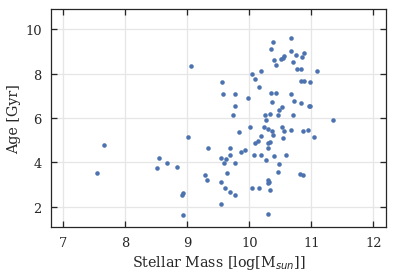

In [190]:
sns.set(context='talk', style='ticks', palette='deep', 
        font='serif', font_scale=1, color_codes=True)

fig = plt.figure()
plt.plot(np.log10(data['stellarmass'].values), data['age'].values, '.')
plt.xlim(6.8,12.2)
plt.ylim(1.1, 10.9)
ax = plt.gca()  # very helpful
ax.get_yaxis().set_tick_params(direction='in', top='on')
ax.get_xaxis().set_tick_params(direction='in', right='on')
ax.set_axisbelow(True)   # moves axis beind values, maybe
plt.xlabel(r'Stellar Mass [log[M$_{sun}$]]')
plt.ylabel(r'Age [Gyr]')
plt.grid(which='major', color='0.90', linestyle='-')
# fig.set_tight_layout({'pad': 1.5})
plt.show()

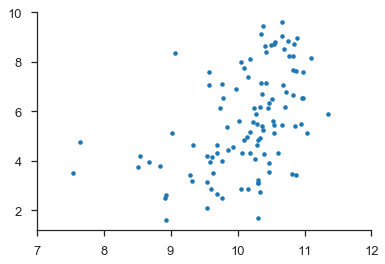

In [131]:
sns.set_style('ticks')
plt.plot(np.log10(data['stellarmass'].values), data['age'].values, '.')
plt.xlim(7,12)
sns.despine()
plt.show()

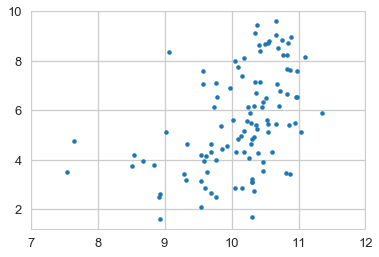

In [118]:
sns.set_style('whitegrid')
plt.plot(np.log10(data['stellarmass'].values), data['age'].values, '.')
plt.xlim(7,12)
plt.show()

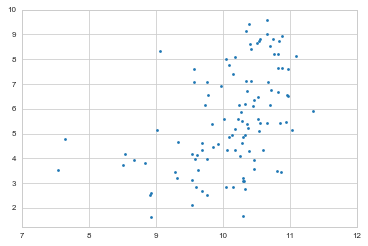

In [132]:
sns.set_style('whitegrid')
sns.set_context('paper')
plt.plot(np.log10(data['stellarmass'].values), data['age'].values, '.')
plt.xlim(7,12)
plt.show()

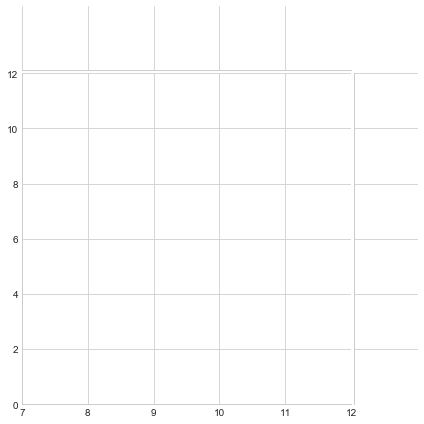

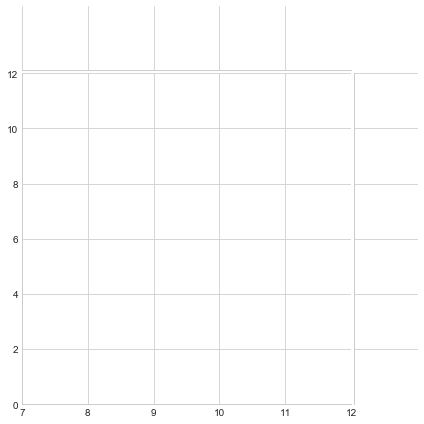

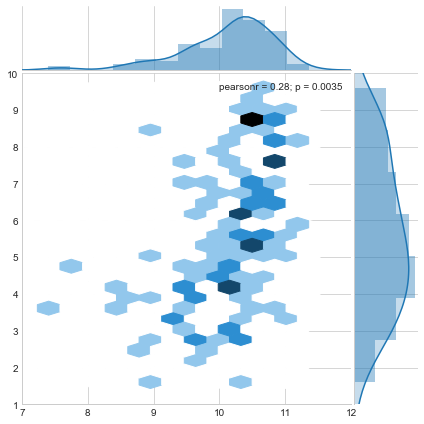

In [95]:
sns.jointplot(np.log10(data['stellarmass'].values), data['age'].values, kind="hex", gridsize=25,
                  bins=None, space=0.05, xlim=(7,12),  ylim=(1,10), #ylim=(-0.75, 1.4),
                  marginal_kws={'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}}
                 )
# sns.jointplot(np.log10(data['stellarmass'].values), data['age'].values, kind="kde",
#               stat_func=None, levels=3,
#               space=0.05, xlim=(7,12),  ylim=(0,12), #ylim=(-0.75, 1.4),
# #               marginal_kws={'kde':True, 'hist':True,
# #                             'kde_kws':{"shade":True}}
#                  ).set_axis_labels('Galaxy Stellar Mass [log(M/M$_{\odot}$)]', 
#                                    'local age [Gyr]')
plt.show()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


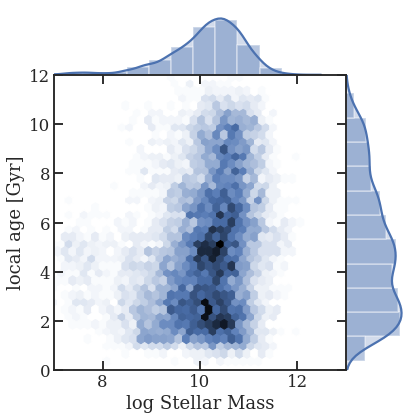

In [20]:
sns.set(context='talk', style='ticks', font='serif', color_codes=True)

g = sns.jointplot(np.log10(plot['stellarmass'].values), plot['age'].values, kind="hex", 
                  gridsize=35, bins=None,
                  space=0.0, xlim=(7,13),  ylim=(0,12), #ylim=(-0.75, 1.4),
                  marginal_kws={'bins':12, 'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}}
                 )
# sns.jointplot(np.log10(data['stellarmass'].values), data['age'].values, kind="kde",
#               stat_func=None, levels=3,
#               space=0.05, xlim=(7,12),  ylim=(0,12), #ylim=(-0.75, 1.4),
# #               marginal_kws={'kde':True, 'hist':True,
# #                             'kde_kws':{"shade":True}}
#                  ).set_axis_labels('Galaxy Stellar Mass [log(M/M$_{\odot}$)]', 
#                                    'local age [Gyr]')

g.ax_joint.tick_params(axis='both', direction='in')
g.ax_joint.set_axisbelow(False)    # bring axis to be ontop of hexbin so that the tick marks are visible

g = g.set_axis_labels('log Stellar Mass', 'local age [Gyr]')

# g.savefig(savename)
plt.show()

In [16]:
min(np.log10(plot['stellarmass'].values))

1.9668298927455905

In [17]:
max(np.log10(plot['stellarmass'].values))

12.288872122732558

In [34]:
plot['stellarmass'].describe()

count    1.100000e+04
mean     3.763786e+10
std      6.291330e+10
min      5.963999e+06
25%      5.647263e+09
50%      1.831272e+10
75%      4.534502e+10
max      1.944787e+12
Name: stellarmass, dtype: float64

In [29]:
galaxy['stellarmass'].describe()

count    1.100000e+02
mean     3.019712e+10
std      3.445990e+10
min      3.521470e+07
25%      5.778468e+09
50%      2.017830e+10
75%      3.881015e+10
max      2.267200e+11
Name: stellarmass, dtype: float64

In [24]:
galaxy[galaxy['stellarmass'] < 1*10**6]

,redshift,stellarmass
GAL,,
15483,0.0,592.609


In [15]:
sns.set(context='talk', style='ticks', font='serif', color_codes=True)

In [16]:
import matplotlib

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


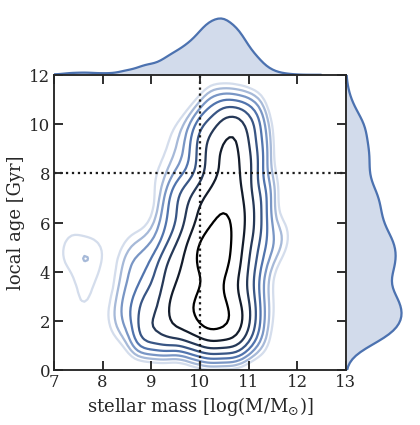

In [19]:
g = sns.jointplot(np.log10(plot['stellarmass'].values), plot['age'].values, kind="kde",
                  space=0.0, xlim=(7,13),  ylim=(0,12),
                  shade_lowest=False,
                  shade=False,
#                   n_levels=20,
#                   cbar=True,
                  levels=np.logspace(-2.5,-1,10),
                  norm=matplotlib.colors.LogNorm()  #Scale the colors to be on a log scale
                 )

## plot "step" lines
size = np.ones(100)
x = np.linspace(7,13,100)
y = np.linspace(0,12,100)
g.ax_joint.plot(10*size, y, 'k:')  # mass step
g.ax_joint.plot(x, 8*size, 'k:')  # age step

g = g.annotate(spearmanr, template="", frameon=False)  # remove 

g.ax_joint.tick_params(axis='both', direction='in')
g.ax_joint.set_axisbelow(False)    # bring axis to be ontop of hexbin so that the tick marks are visible
g.ax_joint.set_xticks(range(7,14))

g = g.set_axis_labels('stellar mass [log(M/M$_{\odot}$)]', 'local age [Gyr]')

g.savefig('AgevMass-local.pdf')
plt.show()